<div style="text-align: center;">
    <img src="image%20(1).png" alt="New York City schoolbus" style="border-radius: 15px; box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); width: 50%;"/>
    <p><em><b>Customer Churn Analysis & Prediction📊</b></em></p>
</div>


<div style="text-align: center; color: #d0d3d4; background-image: url('—Pngtree—blue technology texture metal texture_1648798.png'); background-size: cover; background-position: center; padding: 0px;">
    <h1><b><i>Data Exploration</i></b></h1>
</div>


> ### ***import necessery Libraries***


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

>### ***Read CSV File***

In [200]:
data = pd.read_csv('credit_card_churn.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


>### ***Shape of data***

In [201]:
data.shape
print(f'The number of rows (Observations) : {data.shape[0]}')
print(f'The number of columns (Features) : {data.shape[1]}')

The number of rows (Observations) : 10127
The number of columns (Features) : 23


> ### ***Columns***

In [202]:
columns = pd.DataFrame(data.columns , columns=['Column Name'])
columns

,Column Name
0,CLIENTNUM
1,Attrition_Flag
2,Customer_Age
3,Gender
4,Dependent_count
5,Education_Level
6,Marital_Status
7,Income_Category
8,Card_Category
9,Months_on_book


### The Targer is > (***Churn***)

> ### ***dtypes of The data***

In [203]:
dtypes = pd.DataFrame(data.dtypes , columns=['Data type']).reset_index(names=['Column Name'])
dtypes

,Column Name,Data type
0,CLIENTNUM,int64
1,Attrition_Flag,object
2,Customer_Age,int64
3,Gender,object
4,Dependent_count,int64
5,Education_Level,object
6,Marital_Status,object
7,Income_Category,object
8,Card_Category,object
9,Months_on_book,int64


>### ***Data Information***

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

> ### ***Chek nulls & drop it***

<Axes: >

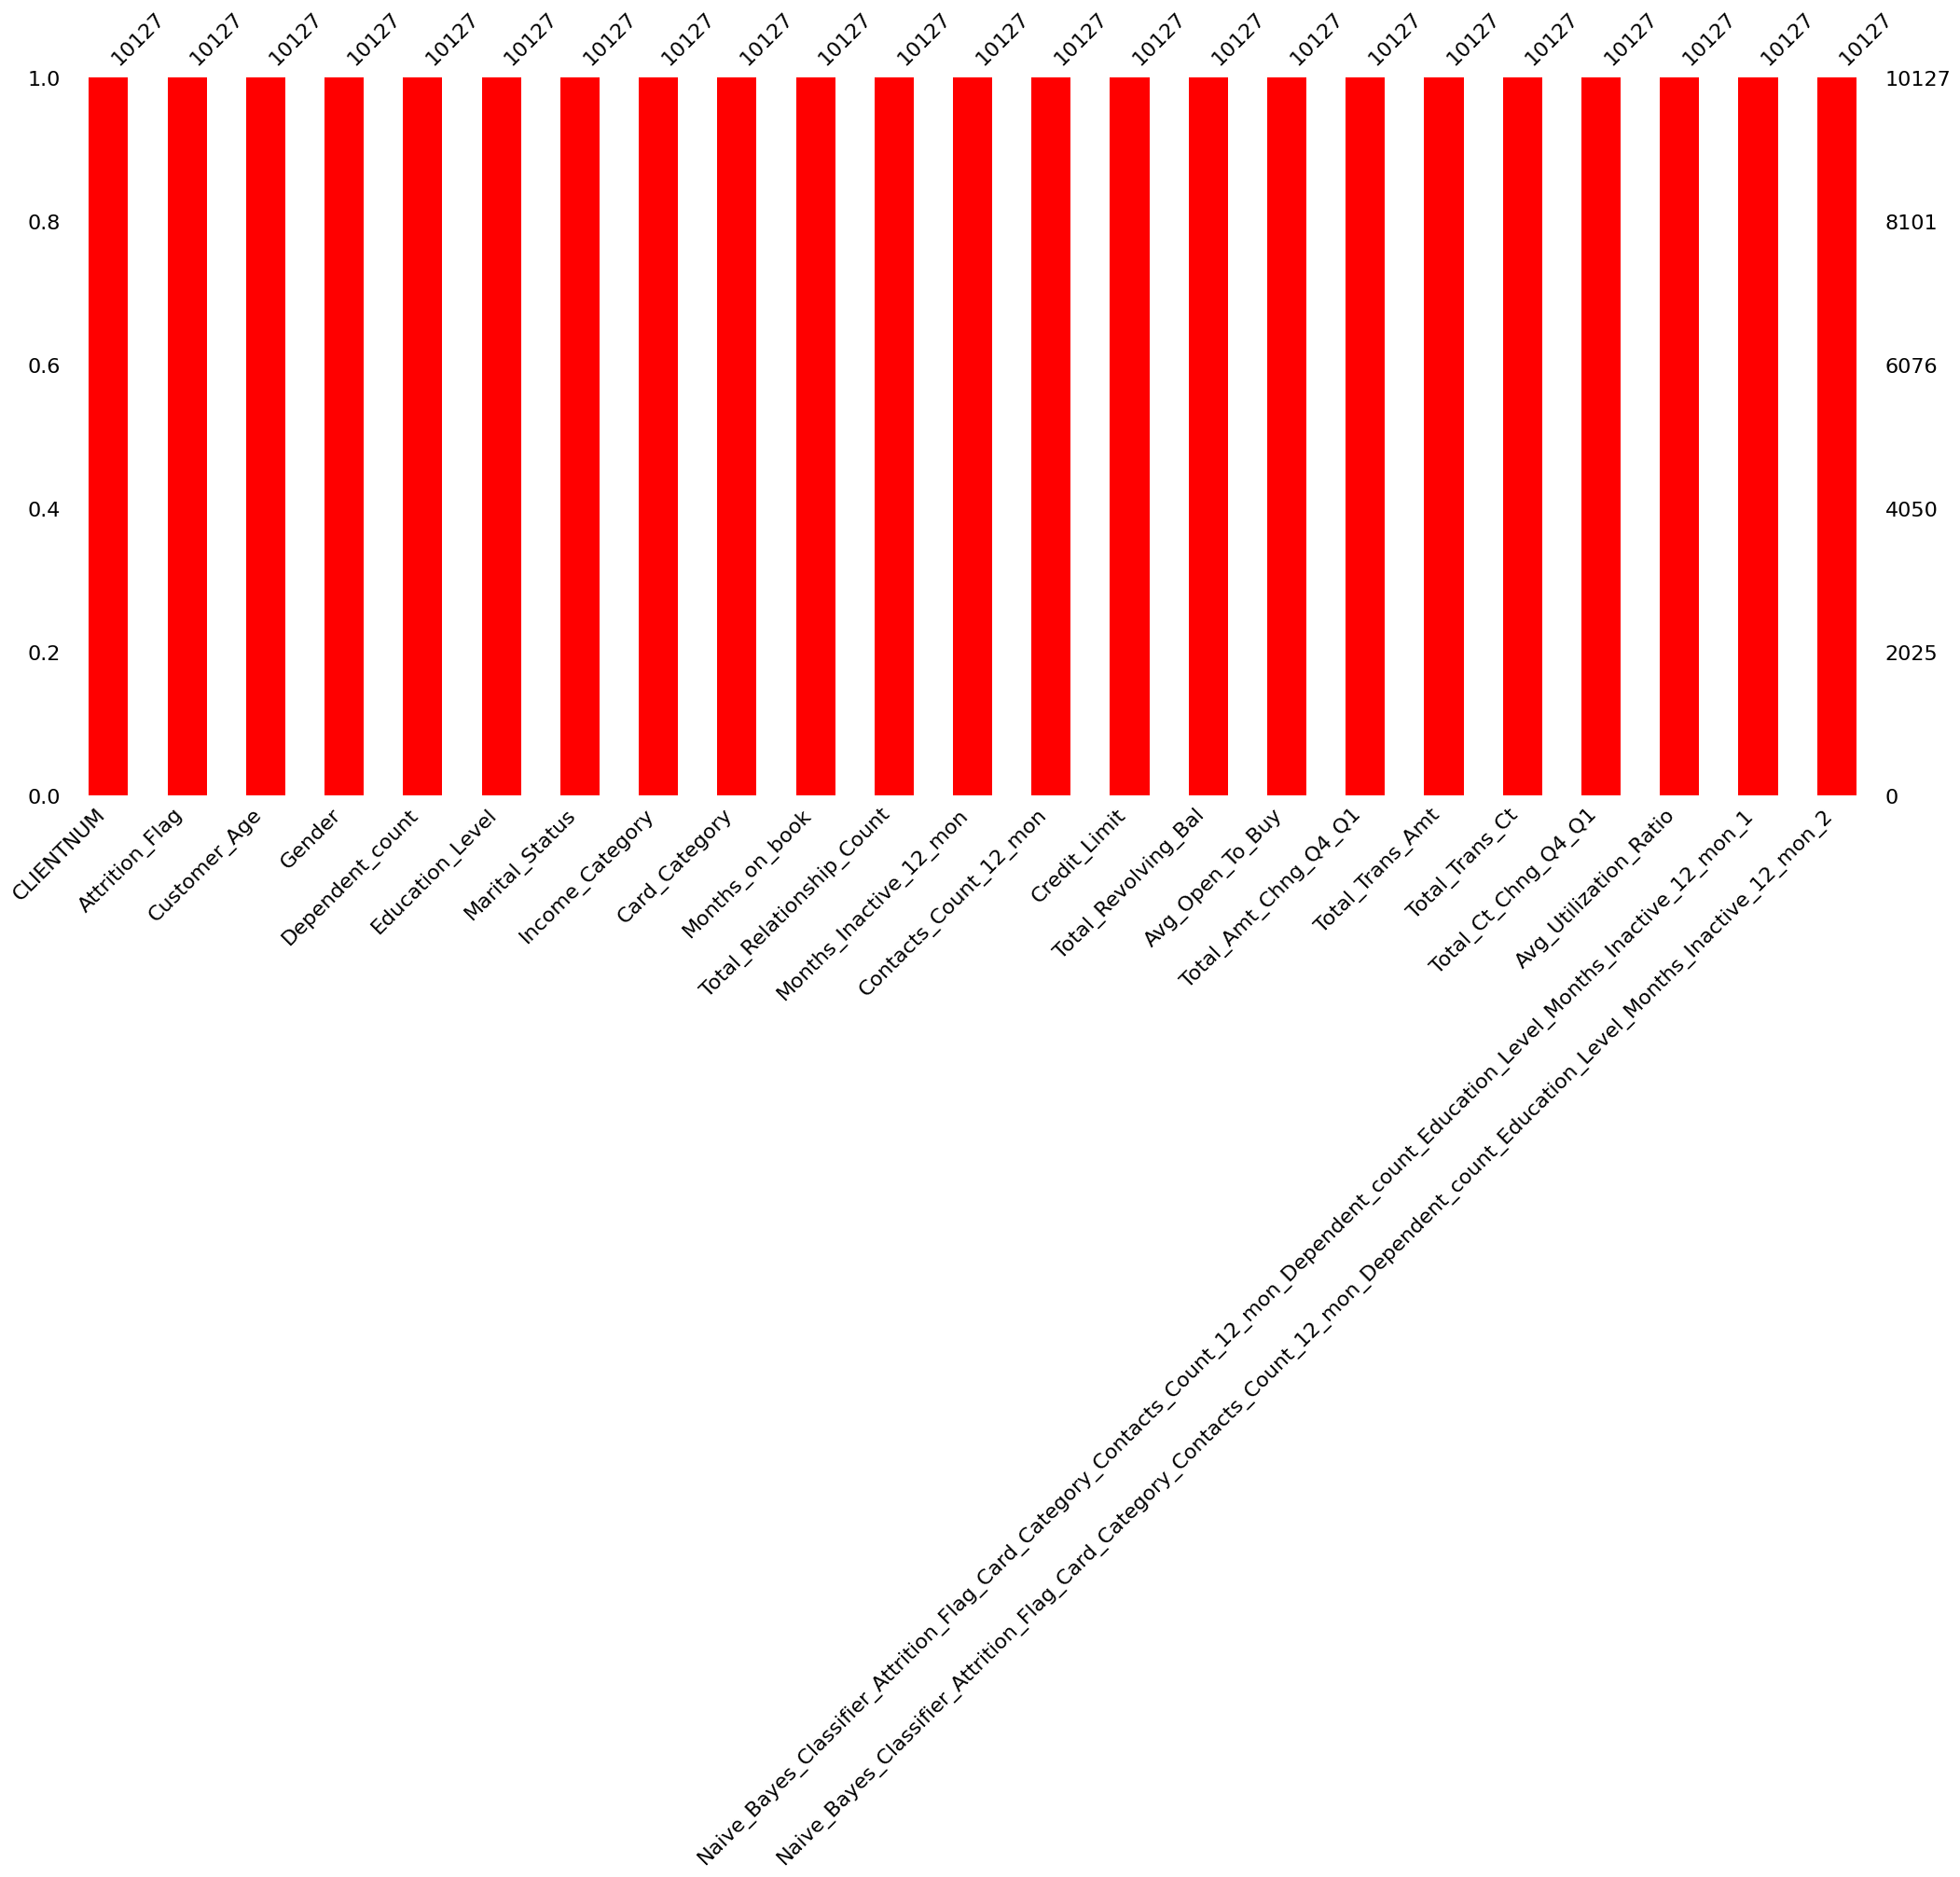

In [205]:
msno.bar(data,color='red')

In [206]:
pd.DataFrame({'Number of Missing Values':data.isnull().sum(),'Percentage Of Missing Values (%)':(data.isnull().sum() / data.shape[0]) * 100})

,Number of Missing Values,Percentage Of Missing Values (%)
CLIENTNUM,0,0.0
Attrition_Flag,0,0.0
Customer_Age,0,0.0
Gender,0,0.0
Dependent_count,0,0.0
Education_Level,0,0.0
Marital_Status,0,0.0
Income_Category,0,0.0
Card_Category,0,0.0
Months_on_book,0,0.0


> ### ***Chek duplicated values***

In [207]:
data[data.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


> ### ***descriptive statistics***

In [208]:
data.describe(include='number').T.style.highlight_max(subset=['mean'	,'std'	,'min'	,'25%'	,'50%'	,'75%'	,'max'],color='green')

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000000,739177606.333663,36903783.450231,708082083.000000,713036770.500000,717926358.000000,773143533.000000,828343083.000000
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000


In [209]:
data.describe(include='O').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


<div style="text-align: center; color: #d0d3d4; background-image: url('—Pngtree—blue technology texture metal texture_1648798.png'); background-size: cover; background-position: center; padding: 0px;">
    <h1><b><i>Data Analysis and Visualization</i></b></h1>
</div>

<div style="text-align: center; color: #d0d3d4; background-image: url('—Pngtree—blue technology texture metal texture_1648798.png'); background-size: cover; background-position: center; padding: 0px;">
    <h2><b><i>EDA</i></b> & <b><i>Visualization📊</i></b></h2>
</div>


### ***Validating data types & Updating data types***


In [210]:
# Validating data types & Updating data types
dtypes

,Column Name,Data type
0,CLIENTNUM,int64
1,Attrition_Flag,object
2,Customer_Age,int64
3,Gender,object
4,Dependent_count,int64
5,Education_Level,object
6,Marital_Status,object
7,Income_Category,object
8,Card_Category,object
9,Months_on_book,int64


In [211]:
data.drop(columns=['CLIENTNUM',
                    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                     inplace=True)

> ### ***Select categorical and numerical columns***

In [212]:
cat_columns = list(data.select_dtypes(exclude=['number']).columns)
numerical_columns = list(data.select_dtypes(include='number'))
print(f"Categrical columns >> {cat_columns} <<")
print(f"Numerical columns >> {numerical_columns} <<")
data[cat_columns] = data[cat_columns].astype('category')


Categrical columns >> ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'] <<
Numerical columns >> ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] <<


> ## ***Independent Feature Analysis & Linking Features to Target Variable***

In [213]:
# The number of Categries in Each Columns
for n,i in enumerate(cat_columns , start=1) :
    print(f'{n}-The number of Categories in "{i}" is {data[i].nunique()} and The Categries is > {data[i].unique()}\n ')

1-The number of Categories in "Attrition_Flag" is 2 and The Categries is > ['Existing Customer', 'Attrited Customer']
Categories (2, object): ['Attrited Customer', 'Existing Customer']
 
2-The number of Categories in "Gender" is 2 and The Categries is > ['M', 'F']
Categories (2, object): ['F', 'M']
 
3-The number of Categories in "Education_Level" is 7 and The Categries is > ['High School', 'Graduate', 'Uneducated', 'Unknown', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
                         'Uneducated', 'Unknown']
 
4-The number of Categories in "Marital_Status" is 4 and The Categries is > ['Married', 'Single', 'Unknown', 'Divorced']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']
 
5-The number of Categories in "Income_Category" is 6 and The Categries is > ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['$12

Define Value counts function

In [214]:
def value_counts(data, column):
    value_counts = data[column].value_counts(normalize=True, dropna=False) * 100
    formatted_data = pd.DataFrame({
        'Count': data[column].value_counts(dropna=False),
        'Percentage (%)': value_counts.round(2)
    }).reset_index()

    formatted_data.columns = [column.capitalize(), 'Count', 'Percentage (%)']

    return formatted_data


In [215]:
for col in cat_columns:
    print(f'The {col} Value counts')
    display(value_counts(data , col))
    print(f'The {col} Value counts by Target(Attrition_Flag)')
    display(pd.crosstab(data[col] , data['Attrition_Flag']))

The Attrition_Flag Value counts


,Attrition_flag,Count,Percentage (%)
0,Existing Customer,8500,83.93
1,Attrited Customer,1627,16.07


The Attrition_Flag Value counts by Target(Attrition_Flag)


Attrition_Flag,Attrited Customer,Existing Customer
Attrition_Flag,,
Attrited Customer,1627,0
Existing Customer,0,8500


The Gender Value counts


,Gender,Count,Percentage (%)
0,F,5358,52.91
1,M,4769,47.09


The Gender Value counts by Target(Attrition_Flag)


Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


The Education_Level Value counts


,Education_level,Count,Percentage (%)
0,Graduate,3128,30.89
1,High School,2013,19.88
2,Unknown,1519,15.00
3,Uneducated,1487,14.68
4,College,1013,10.00
5,Post-Graduate,516,5.10
6,Doctorate,451,4.45


The Education_Level Value counts by Target(Attrition_Flag)


Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,154,859
Doctorate,95,356
Graduate,487,2641
High School,306,1707
Post-Graduate,92,424
Uneducated,237,1250
Unknown,256,1263


The Marital_Status Value counts


,Marital_status,Count,Percentage (%)
0,Married,4687,46.28
1,Single,3943,38.94
2,Unknown,749,7.40
3,Divorced,748,7.39


The Marital_Status Value counts by Target(Attrition_Flag)


Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,121,627
Married,709,3978
Single,668,3275
Unknown,129,620


The Income_Category Value counts


,Income_category,Count,Percentage (%)
0,Less than $40K,3561,35.16
1,$40K - $60K,1790,17.68
2,$80K - $120K,1535,15.16
3,$60K - $80K,1402,13.84
4,Unknown,1112,10.98
5,$120K +,727,7.18


The Income_Category Value counts by Target(Attrition_Flag)


Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,126,601
$40K - $60K,271,1519
$60K - $80K,189,1213
$80K - $120K,242,1293
Less than $40K,612,2949
Unknown,187,925


The Card_Category Value counts


,Card_category,Count,Percentage (%)
0,Blue,9436,93.18
1,Silver,555,5.48
2,Gold,116,1.15
3,Platinum,20,0.20


The Card_Category Value counts by Target(Attrition_Flag)


Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,1519,7917
Gold,21,95
Platinum,5,15
Silver,82,473


In [216]:
data.groupby('Gender')[numerical_columns].agg(['max' , 'min' , 'mean',]).T

Gender                                    F             M
Customer_Age             max      67.000000     73.000000
                         min      26.000000     26.000000
                         mean     46.456887     46.178863
Dependent_count          max       5.000000      5.000000
                         min       0.000000      0.000000
                         mean      2.340612      2.352485
Months_on_book           max      56.000000     56.000000
                         min      13.000000     13.000000
                         mean     35.979097     35.871462
Total_Relationship_Count max       6.000000      6.000000
                         min       1.000000      1.000000
                         mean      3.807951      3.817782
Months_Inactive_12_mon   max       6.000000      6.000000
                         min       0.000000      0.000000
                         mean      2.351810      2.329209
Contacts_Count_12_mon    max       6.000000      6.000000
                         min       0.000000      0.000000
                         mean      2.413587      2.502202
Credit_Limit             max   34516.000000  34516.000000
                         min    1438.300000   1438.300000
                         mean   5023.854274  12685.674963
Total_Revolving_Bal      max    2517.000000   2517.000000
                         min       0.000000      0.000000
                         mean   1140.011198   1188.433215
Avg_Open_To_Buy          max   34516.000000  34516.000000
                         min       3.000000     15.000000
                         mean   3883.843076  11497.241749
Total_Amt_Chng_Q4_Q1     max       2.368000      3.397000
                         min       0.000000      0.000000
                         mean      0.754417      0.766147
Total_Trans_Amt          max   17437.000000  18484.000000
                         min     510.000000    530.000000
                         mean   4324.318216   4493.706228
Total_Trans_Ct           max     138.000000    139.000000
                         min      12.000000     10.000000
                         mean     66.352370     63.180541
Total_Ct_Chng_Q4_Q1      max       3.714000      3.571000
                         min       0.000000      0.000000
                         mean      0.713525      0.710759
Avg_Utilization_Ratio    max       0.999000      0.994000
                         min       0.000000      0.000000
                         mean      0.341957      0.199548

* This analysis highlights that while most behaviors are similar between genders, there are notable differences in credit limit, available credit, and credit utilization patterns.

In [217]:
data.groupby('Education_Level')[numerical_columns].agg(['max' , 'min' , 'mean',]).T

Education_Level                     College     Doctorate      Graduate  \
Customer_Age             max      65.000000     66.000000     68.000000   
                         min      26.000000     32.000000     26.000000   
                         mean     45.970385     47.261641     46.323529   
Dependent_count          max       5.000000      5.000000      5.000000   
                         min       0.000000      0.000000      0.000000   
                         mean      2.359329      2.325942      2.347506   
Months_on_book           max      56.000000     56.000000     56.000000   
                         min      13.000000     13.000000     13.000000   
                         mean     35.682132     36.820399     35.970588   
Total_Relationship_Count max       6.000000      6.000000      6.000000   
                         min       1.000000      1.000000      1.000000   
                         mean      3.749260      3.747228      3.825128   
Months_Inactive_12_mon   max       6.000000      6.000000      6.000000   
                         min       0.000000      0.000000      0.000000   
                         mean      2.353406      2.352550      2.350064   
Contacts_Count_12_mon    max       6.000000      6.000000      6.000000   
                         min       0.000000      0.000000      0.000000   
                         mean      2.425469      2.450111      2.459719   
Credit_Limit             max   34516.000000  34516.000000  34516.000000   
                         min    1438.300000   1438.300000   1438.300000   
                         mean   8684.536130   8413.258980   8566.100927   
Total_Revolving_Bal      max    2517.000000   2517.000000   2517.000000   
                         min       0.000000      0.000000      0.000000   
                         mean   1135.783810   1094.084257   1162.380115   
Avg_Open_To_Buy          max   34516.000000  34516.000000  34516.000000   
                         min      36.000000    217.000000     41.000000   
                         mean   7548.752320   7319.174723   7403.720812   
Total_Amt_Chng_Q4_Q1     max       3.397000      2.357000      2.594000   
                         min       0.072000      0.000000      0.000000   
                         mean      0.764443      0.741044      0.757418   
Total_Trans_Amt          max   16518.000000  15785.000000  17995.000000   
                         min     510.000000    647.000000    569.000000   
                         mean   4255.806515   4193.015521   4418.491368   
Total_Trans_Ct           max     130.000000    129.000000    132.000000   
                         min      10.000000     15.000000     11.000000   
                         mean     65.016782     63.784922     64.883312   
Total_Ct_Chng_Q4_Q1      max       3.250000      2.222000      3.714000   
                         min       0.059000      0.000000      0.000000   
                         mean      0.714878      0.692656      0.710724   
Avg_Utilization_Ratio    max       0.985000      0.913000      0.983000   
                         min       0.000000      0.000000      0.000000   
                         mean      0.265399      0.260619      0.277719   

Education_Level                 High School  Post-Graduate    Uneducated  \
Customer_Age             max      73.000000      65.000000     67.000000   
                         min      26.000000      26.000000     26.000000   
                         mean     46.345256      45.562016     46.423672   
Dependent_count          max       5.000000       5.000000      5.000000   
                         min       0.000000       0.000000      0.000000   
                         mean      2.311972       2.399225      2.353060   
Months_on_book           max      56.000000      56.000000     56.000000   
                         min      13.000000      13.000000     13.000000   
                         mean     35.970691      35.352713     35.949563   
Total_Relation

* Also This analysis highlights that while most behaviors are similar between Education Level, there are notable differences in credit limit, available credit, and credit utilization patterns.

In [218]:
data.groupby('Income_Category')[numerical_columns].agg(['max' , 'min' , 'mean',]).T

Income_Category                     $120K +   $40K - $60K   $60K - $80K  \
Customer_Age             max      62.000000     73.000000     63.000000   
                         min      26.000000     26.000000     26.000000   
                         mean     47.603851     46.087151     45.968616   
Dependent_count          max       5.000000      5.000000      5.000000   
                         min       0.000000      0.000000      0.000000   
                         mean      2.462173      2.308380      2.440086   
Months_on_book           max      54.000000     56.000000     56.000000   
                         min      13.000000     13.000000     13.000000   
                         mean     36.891334     35.873184     35.597004   
Total_Relationship_Count max       6.000000      6.000000      6.000000   
                         min       1.000000      1.000000      1.000000   
                         mean      3.778542      3.783240      3.833809   
Months_Inactive_12_mon   max       6.000000      6.000000      6.000000   
                         min       0.000000      0.000000      0.000000   
                         mean      2.331499      2.294413      2.329529   
Contacts_Count_12_mon    max       6.000000      6.000000      6.000000   
                         min       0.000000      0.000000      0.000000   
                         mean      2.537827      2.460894      2.455777   
Credit_Limit             max   34516.000000  23981.000000  34516.000000   
                         min    1438.300000   1438.300000   1438.300000   
                         mean  19717.322558   5462.259832  10758.772967   
Total_Revolving_Bal      max    2517.000000   2517.000000   2517.000000   
                         min       0.000000      0.000000      0.000000   
                         mean   1222.196699   1171.994413   1154.993581   
Avg_Open_To_Buy          max   34516.000000  23981.000000  34516.000000   
                         min     250.000000      3.000000     61.000000   
                         mean  18495.125860   4290.265419   9603.779387   
Total_Amt_Chng_Q4_Q1     max       1.975000      2.357000      3.355000   
                         min       0.000000      0.000000      0.000000   
                         mean      0.752459      0.759531      0.772189   
Total_Trans_Amt          max   16695.000000  17744.000000  18484.000000   
                         min     602.000000    569.000000    530.000000   
                         mean   4529.467675   4405.618994   4450.712553   
Total_Trans_Ct           max     139.000000    131.000000    134.000000   
                         min      10.000000     11.000000     10.000000   
                         mean     63.704264     65.000559     63.247504   
Total_Ct_Chng_Q4_Q1      max       2.000000      2.750000      3.500000   
                         min       0.000000      0.000000      0.000000   
                         mean      0.688702      0.711113      0.720776   
Avg_Utilization_Ratio    max       0.856000      0.999000      0.976000   
                         min       0.000000      0.000000      0.000000   
                         mean      0.125307      0.316561      0.206075   

Income_Category                $80K - $120K  Less than $40K       Unknown  
Customer_Age             max      63.000000       70.000000     68.000000  
                         min      27.000000       26.000000     26.000000  
                         mean     46.428013       46.297950     46.274281  
Dependent_count          max       5.000000        5.000000      5.000000  
                         min       0.000000        0.000000      0.000000  
                         mean      2.492508        2.263690      2.275180  
Months_on_book           max      56.000000       56.000000     56.000000  
                         min      13.000000       13.000000     13.000000  
                         mean     36.074267       35.881775     35.753597  
Total_Relation

*   ****Targeted Credit Limit Management
Key Insight: The credit limits vary significantly across income categories. Higher income groups (e.g., $120K+) have an average credit limit of $19,717, while lower income groups like those earning Less than $40K have much lower credit limits ($3,754).
Actionable Strategy: You can enhance customer satisfaction and loyalty by offering personalized credit limits based on spending habits, not just income. Customers in lower income categories might appreciate higher limits if they demonstrate good credit behavior, improving retention.****


* ********Optimized Utilization of Revolving Balance
Key Insight: The Average Utilization Ratio is much higher for lower income categories (e.g., 0.38 for Less than $40K) compared to higher income groups (0.12 for $120K+). This suggests lower-income customers rely more on their revolving credit balances.
Actionable Strategy: Implement a reward program or financial coaching aimed at helping lower-income customers manage their credit utilization better. This could reduce credit risk and foster trust, while also encouraging higher card usage in a controlled way, benefiting both the customer and the business.********

## ***Analyze distribution across target categories***

In [219]:
def add_custom_stats(df, value_counts_df, category_column, columns):
    """
    Adds minimum, maximum, and average statistics for each specified column to the value counts DataFrame,
    with styled output resembling a bar plot.

    Parameters:
    - df: Original pandas DataFrame containing the data.
    - value_counts_df: DataFrame with value counts (output of value_counts function).
    - category_column: str, name of the column containing categories.
    - columns: list of str, names of the columns to calculate statistics for.

    Returns:
    - A styled DataFrame with added statistics columns and bar plot-like representation.
    """
    # Find the correct case for the category column in both DataFrames
    df_category_col = next((col for col in df.columns if col.lower() == category_column.lower()), None)
    vc_category_col = next((col for col in value_counts_df.columns if col.lower() == category_column.lower()), None)

    if df_category_col is None or vc_category_col is None:
        raise ValueError(f"Column '{category_column}' not found in one or both DataFrames.")

    stats_cols = []
    for col in columns:
        # Find the correct case for each column
        correct_col = next((c for c in df.columns if c.lower() == col.lower()), None)
        if correct_col is None:
            raise ValueError(f"Column '{col}' not found in the DataFrame.")

        # Calculate statistics for each category
        stats = df.groupby(df_category_col)[correct_col].agg(['min', 'max', 'mean']).reset_index()
        stats.columns = [df_category_col, f'min_{col}', f'max_{col}', f'avg_{col}']

        # Round the values to 2 decimal places
        stats[f'min_{col}'] = stats[f'min_{col}'].round(2)
        stats[f'max_{col}'] = stats[f'max_{col}'].round(2)
        stats[f'avg_{col}'] = stats[f'avg_{col}'].round(2)

        stats_cols.append(stats)

    # Merge all statistics DataFrames
    result_df = value_counts_df.copy()
    for stats in stats_cols:
        result_df = pd.merge(result_df, stats, left_on=vc_category_col, right_on=df_category_col, how='left')

    # Drop duplicate category column
    result_df = result_df.loc[:, ~result_df.columns.duplicated()]

    # Reorder columns
    column_order = [vc_category_col, 'Count', 'Percentage (%)'] + [col for sublist in [[f'min_{col}', f'max_{col}', f'avg_{col}'] for col in columns] for col in sublist]
    result_df = result_df[column_order]

    # Style the DataFrame
    format_dict = {f'Percentage (%)': '{:.2f}%'}
    for col in columns:
        format_dict.update({f'min_{col}': '{:.2f}', f'max_{col}': '{:.2f}', f'avg_{col}': '{:.2f}'})

    styled_df = result_df.style.format(format_dict)

    # Apply bar representation
    for col in columns:
        max_min = result_df[f'min_{col}'].max()
        max_max = result_df[f'max_{col}'].max()
        max_avg = result_df[f'avg_{col}'].max()

        styled_df.bar(subset=[f'min_{col}'], color='#5ad8a6', vmin=0, vmax=max_min)
        styled_df.bar(subset=[f'max_{col}'], color='#ff6e76', vmin=0, vmax=max_max)
        styled_df.bar(subset=[f'avg_{col}'], color='#fac858', vmin=0, vmax=max_avg)

    # Set table styles for night mode compatibility
    styled_df.set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white')]},
        {'selector': 'td', 'props': [('background-color', '#34495e'), ('color', 'white')]},
    ])

    return styled_df

# Usage example:
# stats_df = add_custom_stats(df, value_counts_df, 'category_column', ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1'])


In [220]:
value_countsd = value_counts(data ,'Attrition_Flag')
value_countsd

,Attrition_flag,Count,Percentage (%)
0,Existing Customer,8500,83.93
1,Attrited Customer,1627,16.07


In [221]:
for col in numerical_columns:

    display(add_custom_stats(data,value_countsd,'Attrition_Flag',[col]))

,Attrition_flag,Count,Percentage (%),min_Customer_Age,max_Customer_Age,avg_Customer_Age
0,Existing Customer,8500,83.93%,26.00,73.00,46.26
1,Attrited Customer,1627,16.07%,26.00,68.00,46.66


,Attrition_flag,Count,Percentage (%),min_Dependent_count,max_Dependent_count,avg_Dependent_count
0,Existing Customer,8500,83.93%,0.00,5.00,2.34
1,Attrited Customer,1627,16.07%,0.00,5.00,2.40


,Attrition_flag,Count,Percentage (%),min_Months_on_book,max_Months_on_book,avg_Months_on_book
0,Existing Customer,8500,83.93%,13.00,56.00,35.88
1,Attrited Customer,1627,16.07%,13.00,56.00,36.18


,Attrition_flag,Count,Percentage (%),min_Total_Relationship_Count,max_Total_Relationship_Count,avg_Total_Relationship_Count
0,Existing Customer,8500,83.93%,1.00,6.00,3.91
1,Attrited Customer,1627,16.07%,1.00,6.00,3.28


,Attrition_flag,Count,Percentage (%),min_Months_Inactive_12_mon,max_Months_Inactive_12_mon,avg_Months_Inactive_12_mon
0,Existing Customer,8500,83.93%,0.00,6.00,2.27
1,Attrited Customer,1627,16.07%,0.00,6.00,2.69


,Attrition_flag,Count,Percentage (%),min_Contacts_Count_12_mon,max_Contacts_Count_12_mon,avg_Contacts_Count_12_mon
0,Existing Customer,8500,83.93%,0.00,5.00,2.36
1,Attrited Customer,1627,16.07%,0.00,6.00,2.97


,Attrition_flag,Count,Percentage (%),min_Credit_Limit,max_Credit_Limit,avg_Credit_Limit
0,Existing Customer,8500,83.93%,1438.30,34516.00,8726.88
1,Attrited Customer,1627,16.07%,1438.30,34516.00,8136.04


,Attrition_flag,Count,Percentage (%),min_Total_Revolving_Bal,max_Total_Revolving_Bal,avg_Total_Revolving_Bal
0,Existing Customer,8500,83.93%,0.00,2517.00,1256.60
1,Attrited Customer,1627,16.07%,0.00,2517.00,672.82


,Attrition_flag,Count,Percentage (%),min_Avg_Open_To_Buy,max_Avg_Open_To_Buy,avg_Avg_Open_To_Buy
0,Existing Customer,8500,83.93%,15.00,34516.00,7470.27
1,Attrited Customer,1627,16.07%,3.00,34516.00,7463.22


,Attrition_flag,Count,Percentage (%),min_Total_Amt_Chng_Q4_Q1,max_Total_Amt_Chng_Q4_Q1,avg_Total_Amt_Chng_Q4_Q1
0,Existing Customer,8500,83.93%,0.26,3.40,0.77
1,Attrited Customer,1627,16.07%,0.00,1.49,0.69


,Attrition_flag,Count,Percentage (%),min_Total_Trans_Amt,max_Total_Trans_Amt,avg_Total_Trans_Amt
0,Existing Customer,8500,83.93%,816.00,18484.00,4654.66
1,Attrited Customer,1627,16.07%,510.00,10583.00,3095.03


,Attrition_flag,Count,Percentage (%),min_Total_Trans_Ct,max_Total_Trans_Ct,avg_Total_Trans_Ct
0,Existing Customer,8500,83.93%,11.00,139.00,68.67
1,Attrited Customer,1627,16.07%,10.00,94.00,44.93


,Attrition_flag,Count,Percentage (%),min_Total_Ct_Chng_Q4_Q1,max_Total_Ct_Chng_Q4_Q1,avg_Total_Ct_Chng_Q4_Q1
0,Existing Customer,8500,83.93%,0.03,3.71,0.74
1,Attrited Customer,1627,16.07%,0.00,2.50,0.55


,Attrition_flag,Count,Percentage (%),min_Avg_Utilization_Ratio,max_Avg_Utilization_Ratio,avg_Avg_Utilization_Ratio
0,Existing Customer,8500,83.93%,0.00,0.99,0.30
1,Attrited Customer,1627,16.07%,0.00,1.00,0.16


## ***Feature Engineering***

# ***Data Visualization***

> ## ***Data distribution***

>> ### ***distribution of numerical features***

In [222]:
numerical_columns

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

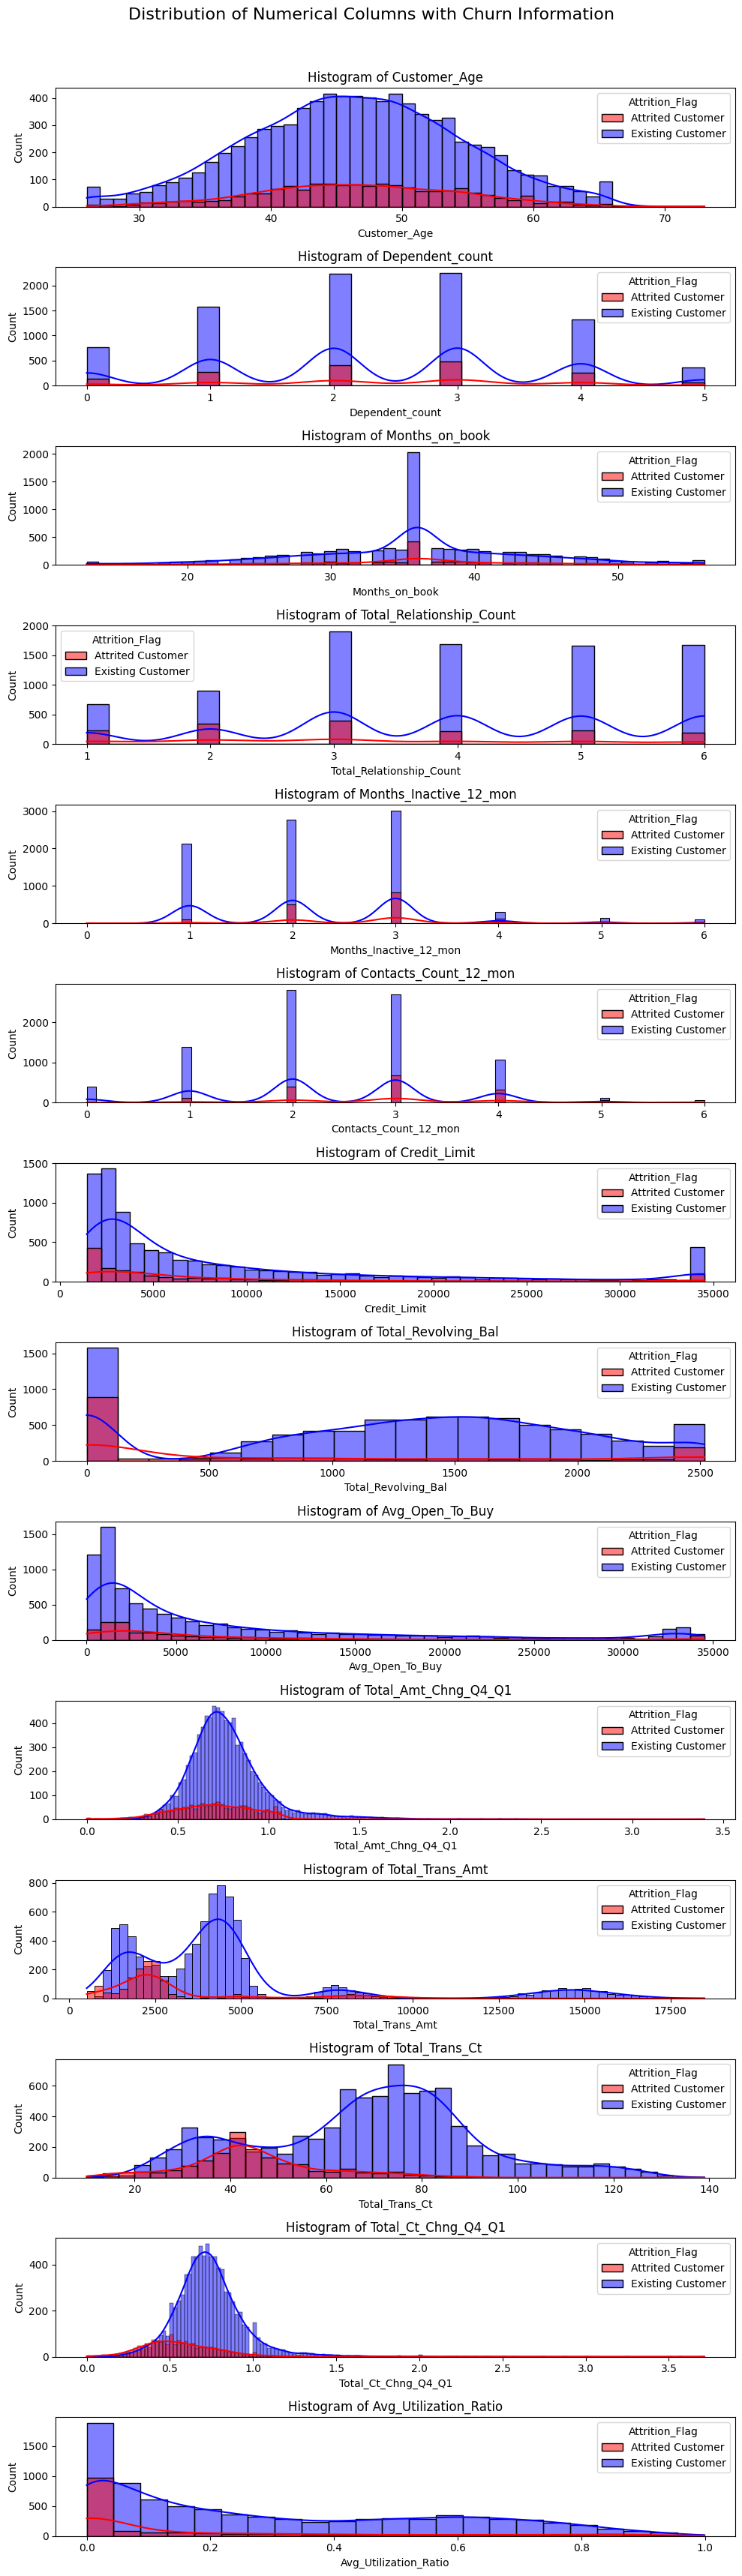

In [223]:
fig, axes = plt.subplots(14, 1, figsize=(10, 35))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(data=data, x=col, ax=axes[i], kde=True, hue='Attrition_Flag', palette=['red', 'blue'])
    axes[i].set_title(f'Histogram of {col}')

# Add the suptitle
fig.suptitle('Distribution of Numerical Columns with Churn Information', fontsize=16)

# Adjust layout to make space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


## ***Boxplot***

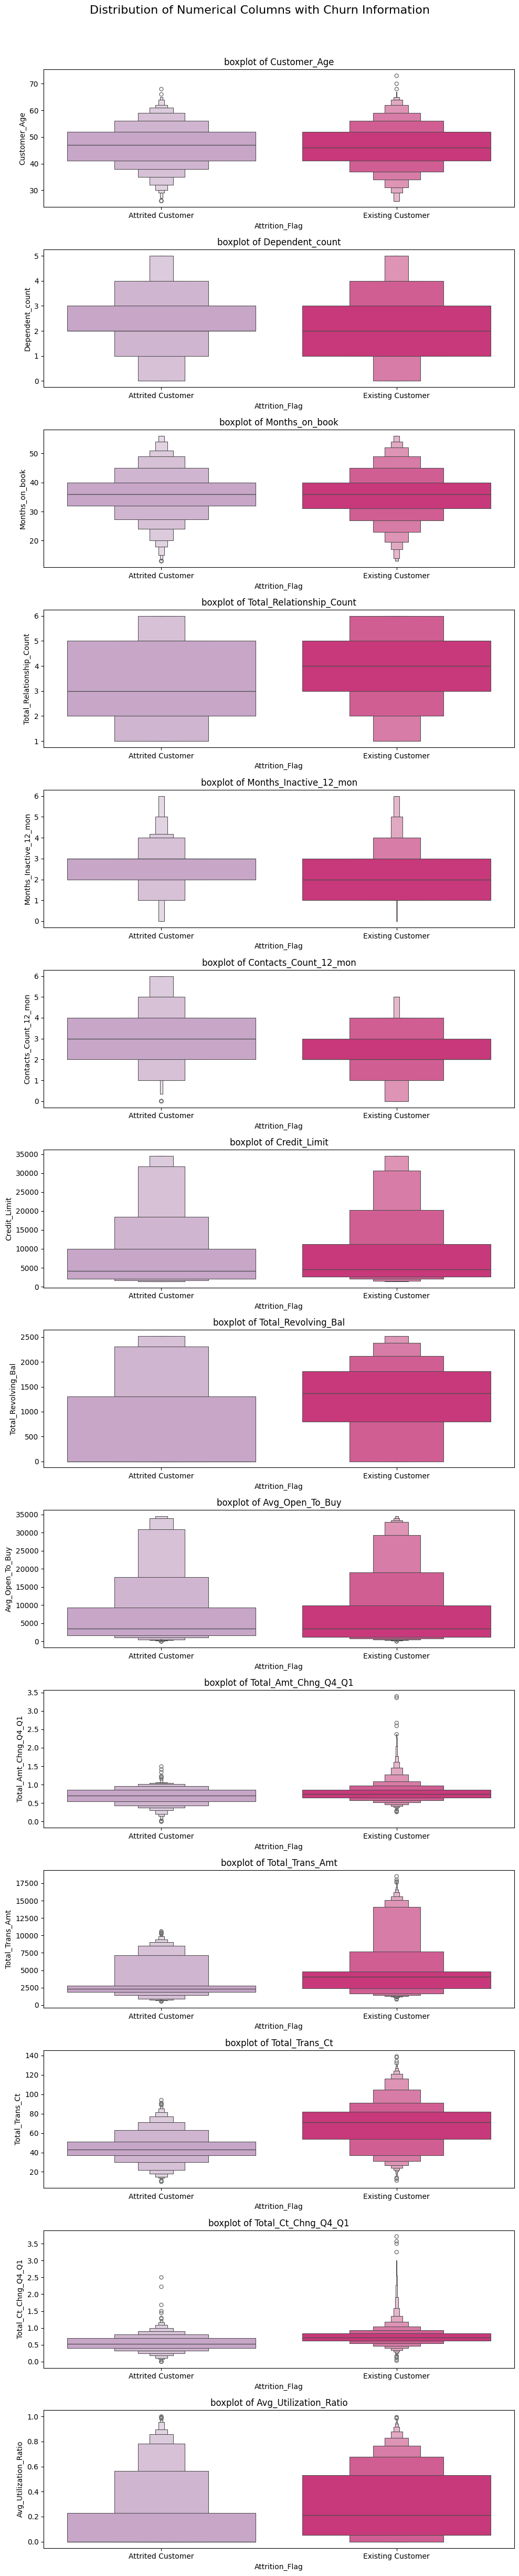

In [224]:
fig, axes = plt.subplots(14, 1, figsize=(10, 50))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxenplot(data=data, y=col, ax=axes[i], x='Attrition_Flag', palette='PuRd')
    axes[i].set_title(f'boxplot of {col}')

# Add the suptitle
fig.suptitle('Distribution of Numerical Columns with Churn Information', fontsize=16)

# Adjust layout to make space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


> ## ***distribution of Categorical data***

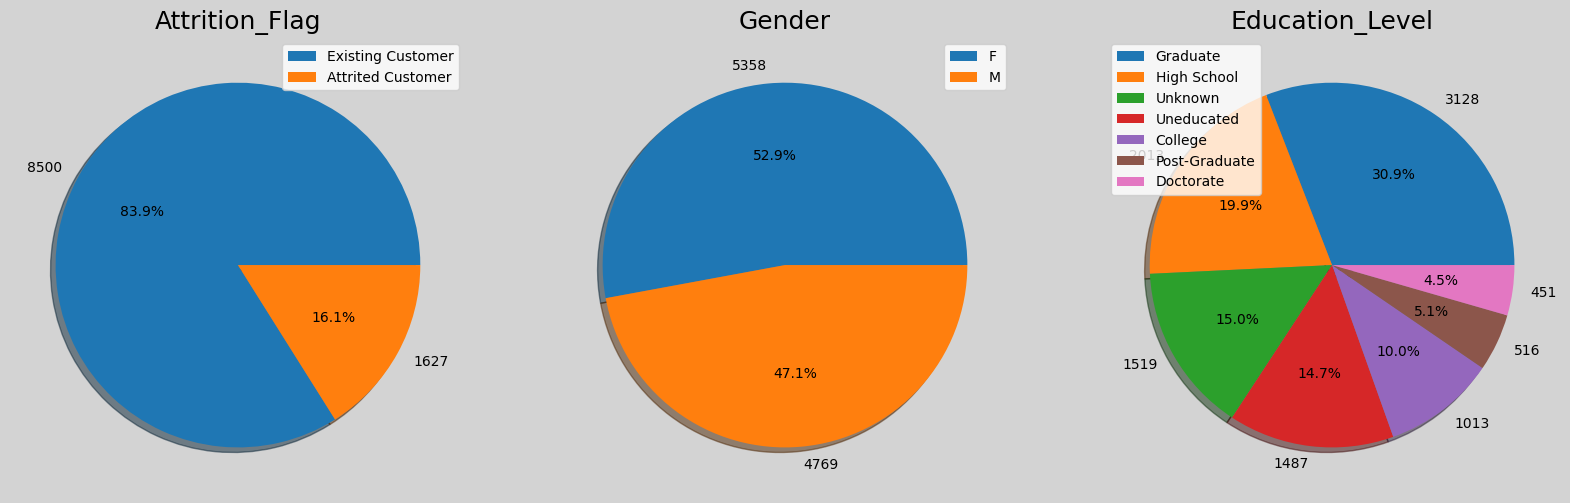

In [225]:
ig, axes = plt.subplots(1, 3, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(cat_columns[:3]):
    ax = axes[i]
    d = data[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%",shadow=True)
    ax.set_title(column,size=18)
    ax.legend(d.index)

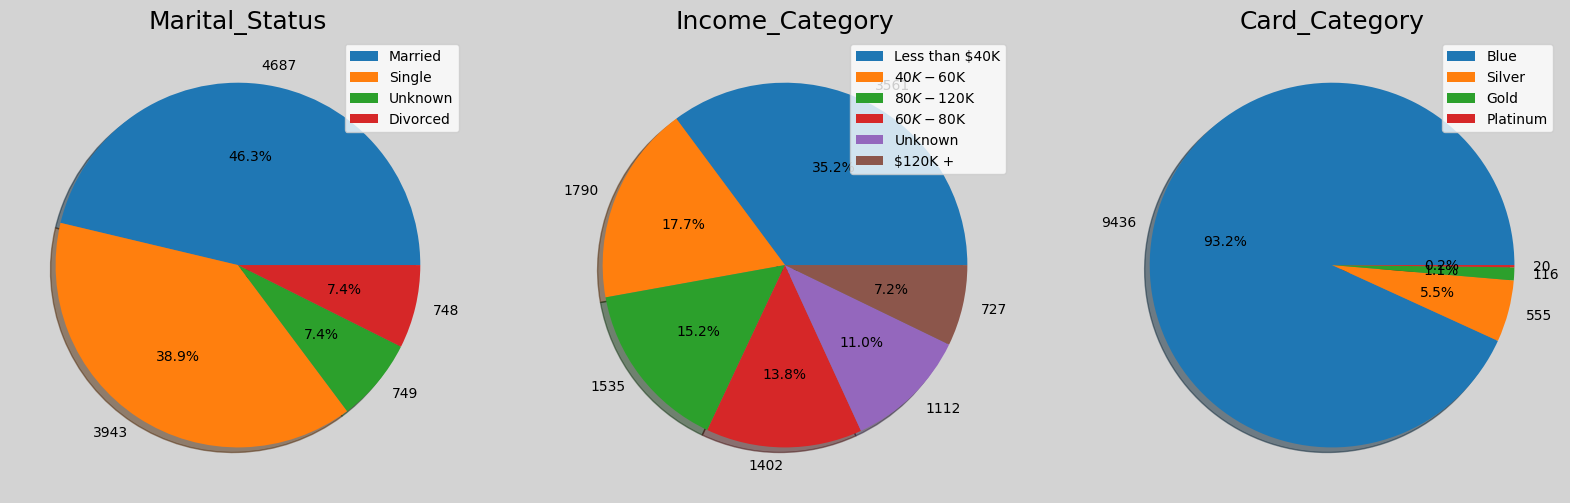

In [226]:
ig, axes = plt.subplots(1, 3, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(cat_columns[3:]):
    ax = axes[i]
    d = data[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%",shadow=True)
    ax.set_title(column,size=18)
    ax.legend(d.index)

### ***Numerical Features by Churn Status***

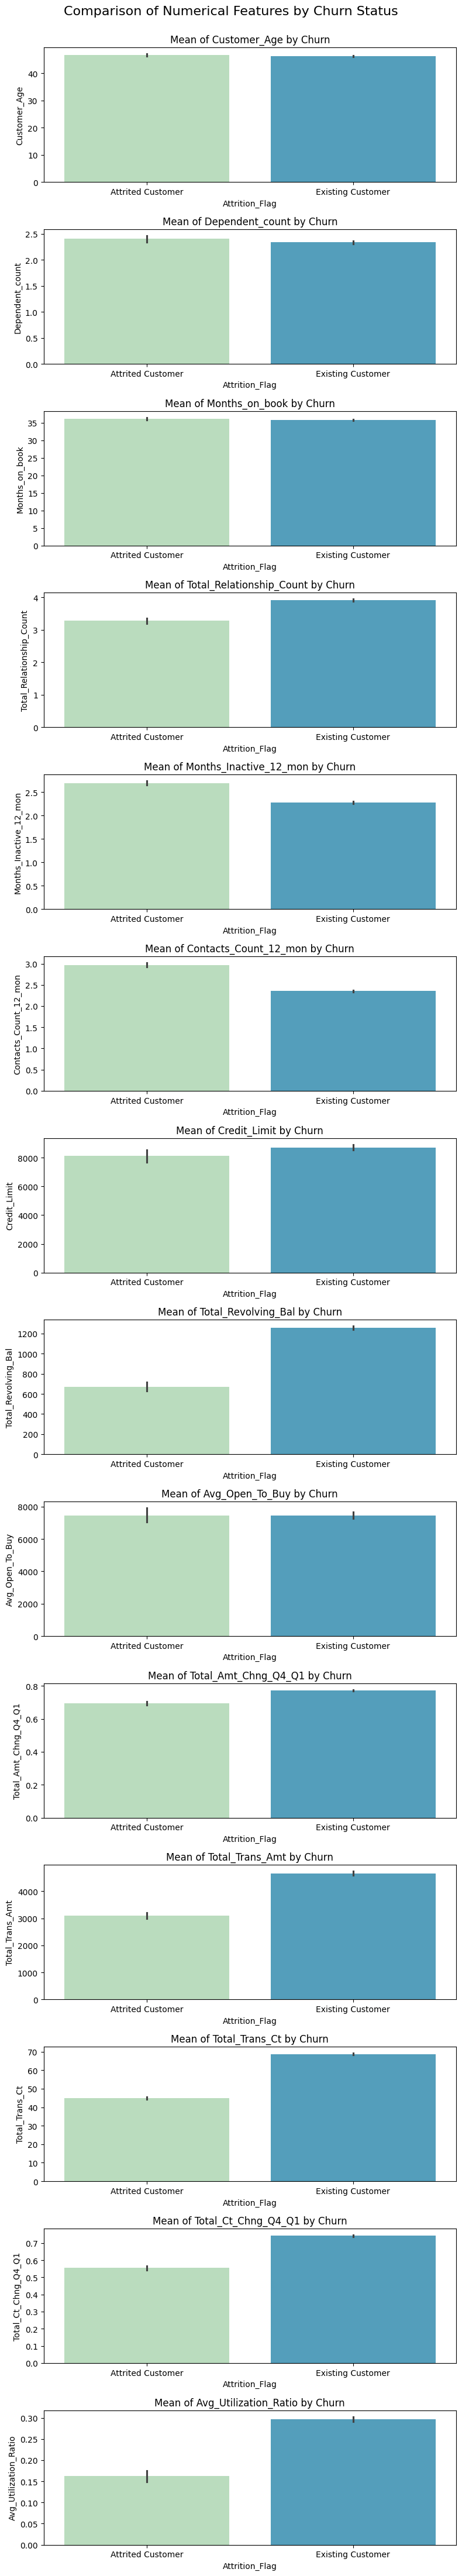

In [227]:
fig, axes = plt.subplots(14, 1, figsize=(8, 44))
important_columns = [
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Months_on_book'
]

for i, col in enumerate(numerical_columns):
    sns.barplot(data=data, x='Attrition_Flag', y=col, ax=axes[i], palette='GnBu')
    axes[i].set_title(f'Mean of {col} by Churn', fontsize=12)

fig.suptitle('Comparison of Numerical Features by Churn Status', fontsize=16 , y =1)

plt.tight_layout()
plt.show()


<div style="text-align: center; color: #d0d3d4; background-image: url('—Pngtree—blue technology texture metal texture_1648798.png'); background-size: cover; background-position: center; padding: 0px;">
    <h1><b><i>Data Preprocessing</i></b></h1>
</div>

## ***Handle outlier***

## ***Encoding & Scaling & Split The Data***

<Axes: >

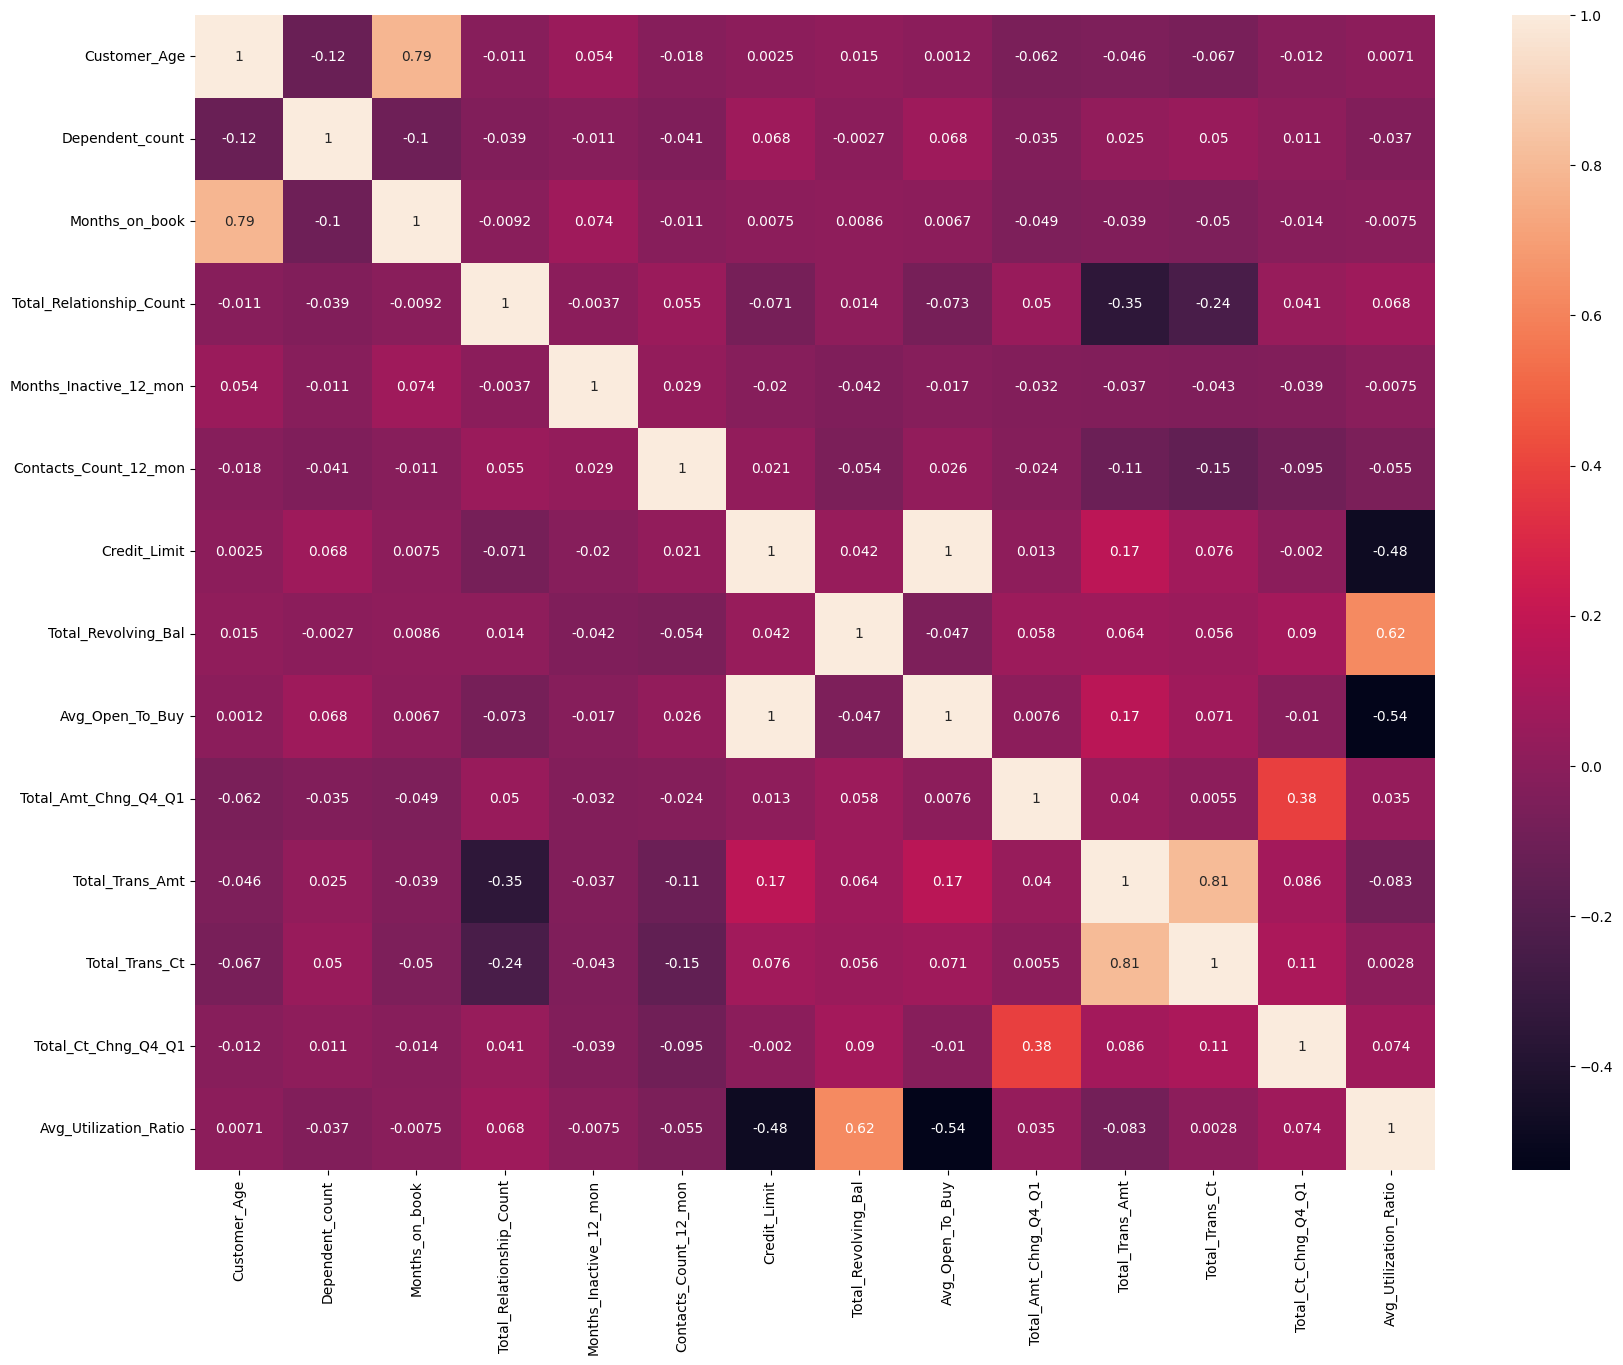

In [228]:
plt.figure(figsize=(20,15))
sns.heatmap(data.select_dtypes(include='number').corr() , annot=True)

In [229]:
# Create a mapping dictionary
mapping = {'Attrited Customer': 1,
           'Existing Customer': 0}
# Apply mapping to convert column to numeric
data['Attrition_Flag'] = data['Attrition_Flag'].replace(mapping)

In [230]:
# Split the data into features (X) and target (y)
X = data.drop("Attrition_Flag", axis=1) # Drop the target column to get the features
y = data["Attrition_Flag"] # Set the target column

In [231]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
X_train['Gender'].unique()
X_test['Gender'].unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [233]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the function
def object_to_int_train(dataframe_series):
    if dataframe_series.dtype == 'category' or dataframe_series.dtype == 'object':
        le = LabelEncoder()
        return le.fit_transform(dataframe_series), le  # Return the encoder as well for later use
    return dataframe_series, None

def object_to_int_test(dataframe_series, encoder):
    if encoder:  # Use the encoder fitted on training data
        return encoder.transform(dataframe_series)
    return dataframe_series


# Apply label encoding to training data
for col in X_train.columns:
    X_train[col], encoder = object_to_int_train(X_train[col])
    if encoder:  # Apply the same encoder to the test data
        # Save them for later use during deployment
        joblib.dump(encoder, f'{col}_encoder.pkl')
        X_test[col] = object_to_int_test(X_test[col], encoder)

# Save them for later use during deployment
joblib.dump(encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [234]:
X_test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3781,48,0,3,5,2,4,0,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
2922,59,1,1,5,2,4,0,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
5070,37,0,2,2,0,4,0,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
7246,47,1,3,1,0,1,0,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
623,42,1,3,6,2,3,0,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


In [235]:
from imblearn.combine import SMOTEENN

# Apply SMOTE to handle class imbalance
smote = SMOTEENN(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

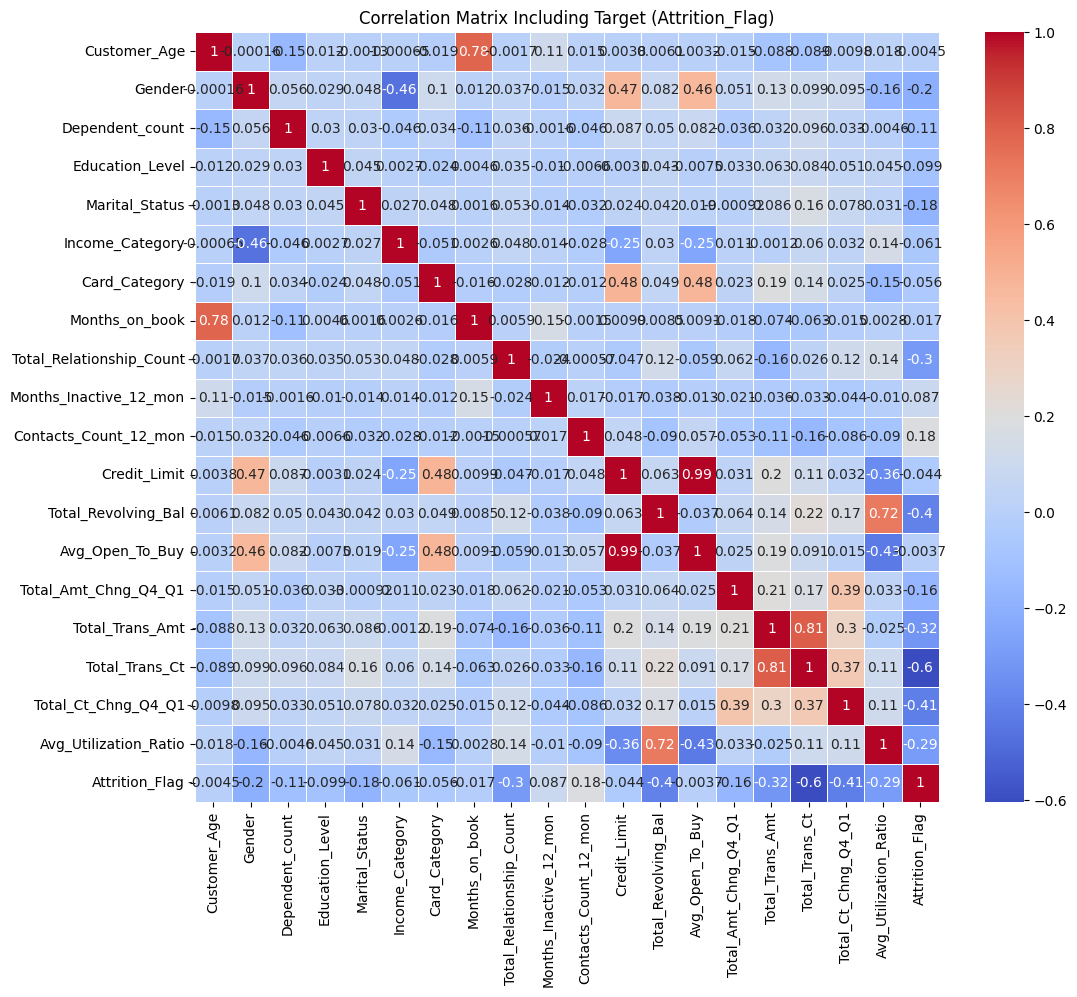

In [236]:
from sklearn.preprocessing import StandardScaler
import joblib

# Columns to scale
columns_to_scale = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                    'Total_Revolving_Bal', 'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Standard Scaling to training and testing data
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Save them for later use during deployment
joblib.dump(scaler, 'scaler.pkl')

# Correlation matrix including target value
train_data = pd.concat([X_train, y_train], axis=1)
corr_matrix = train_data.corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including Target (Attrition_Flag)')
plt.show()



In [ ]:
X_train.columns

## ***Model building***

Accuracy: 0.9442250740375123

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1699
           1       0.78      0.92      0.84       327

    accuracy                           0.94      2026
   macro avg       0.88      0.93      0.90      2026
weighted avg       0.95      0.94      0.95      2026


Confusion Matrix:
[[1613   86]
 [  27  300]]


<Figure size 1200x800 with 0 Axes>

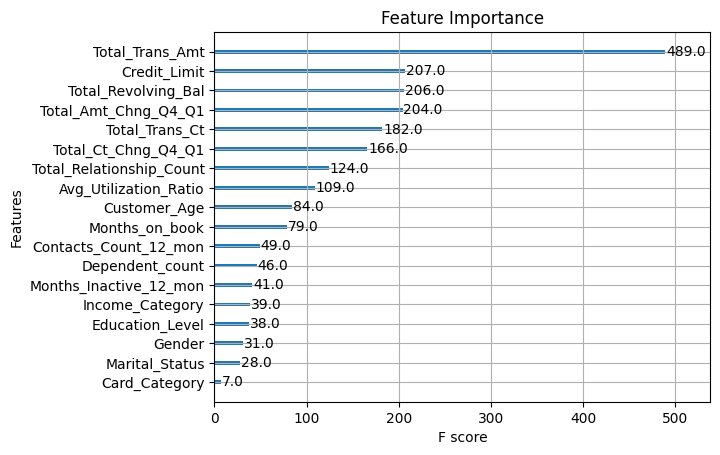

In [769]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report

model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
# Plotting feature importance
plt.figure(figsize=(12, 8))
plot_importance(model, importance_type='weight', title='Feature Importance', xlabel='F score', ylabel='Features')
plt.show()

In [771]:
# Importing libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, recall_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Dictionary of models and their parameter grids
models_params = {
    "Logistic Regression": (LogisticRegression(solver='liblinear'), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],  # L1 and L2 penalties
        'max_iter': [100, 200, 300],
    }),

    "Naive Bayes": (GaussianNB(), {
        # GaussianNB doesn't have many hyperparameters to tune
    }),

    "K-Nearest Neighbors": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    }),

    "Decision Tree Classifier": (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
    }),

    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
    }),

    "AdaBoost": (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1, 10],
    }),

    "Gradient Boosting": (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }),

    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
    }),

    "LightGBM": (LGBMClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [-1, 5, 10],
        'num_leaves': [31, 50, 100],
        'min_child_samples': [20, 50, 100],
    })
}

# Model training with tqdm and GridSearchCV
for name, (model, params) in tqdm(models_params.items(), desc="Training models", total=len(models_params)):

    # Perform Grid Search with Recall as the scoring metric
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='recall', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Model prediction
    model_pred = best_model.predict(X_test)

    # Displaying model results
    print(f"\nModel: {name}")
    print(f"Best Parameters: {best_params}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, model_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, model_pred))


Training models:  22%|██▏       | 2/9 [00:12<00:35,  5.04s/it]


Model: Logistic Regression
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1'}
Confusion Matrix:
[[1452  247]
 [  76  251]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1699
           1       0.50      0.77      0.61       327

    accuracy                           0.84      2026
   macro avg       0.73      0.81      0.75      2026
weighted avg       0.88      0.84      0.85      2026


Model: Naive Bayes
Best Parameters: {}
Confusion Matrix:
[[1335  364]
 [  99  228]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1699
           1       0.39      0.70      0.50       327

    accuracy                           0.77      2026
   macro avg       0.66      0.74      0.67      2026
weighted avg       0.84      0.77      0.79      2026



Training models:  33%|███▎      | 3/9 [01:09<02:53, 28.89s/it]


Model: K-Nearest Neighbors
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Confusion Matrix:
[[1445  254]
 [  71  256]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1699
           1       0.50      0.78      0.61       327

    accuracy                           0.84      2026
   macro avg       0.73      0.82      0.76      2026
weighted avg       0.88      0.84      0.85      2026



Training models:  44%|████▍     | 4/9 [01:22<01:53, 22.77s/it]


Model: Decision Tree Classifier
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}
Confusion Matrix:
[[1600   99]
 [  47  280]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1699
           1       0.74      0.86      0.79       327

    accuracy                           0.93      2026
   macro avg       0.86      0.90      0.87      2026
weighted avg       0.93      0.93      0.93      2026



Training models:  56%|█████▌    | 5/9 [11:48<16:00, 240.24s/it]


Model: Random Forest
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix:
[[1609   90]
 [  32  295]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1699
           1       0.77      0.90      0.83       327

    accuracy                           0.94      2026
   macro avg       0.87      0.92      0.90      2026
weighted avg       0.95      0.94      0.94      2026



Training models:  67%|██████▋   | 6/9 [12:29<08:37, 172.58s/it]


Model: AdaBoost
Best Parameters: {'learning_rate': 10, 'n_estimators': 50}
Confusion Matrix:
[[ 198 1501]
 [   1  326]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.12      0.21      1699
           1       0.18      1.00      0.30       327

    accuracy                           0.26      2026
   macro avg       0.59      0.56      0.26      2026
weighted avg       0.86      0.26      0.22      2026



Training models:  78%|███████▊  | 7/9 [59:31<34:37, 1038.51s/it]


Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Confusion Matrix:
[[1616   83]
 [  19  308]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1699
           1       0.79      0.94      0.86       327

    accuracy                           0.95      2026
   macro avg       0.89      0.95      0.91      2026
weighted avg       0.96      0.95      0.95      2026



Training models:  89%|████████▉ | 8/9 [1:02:32<12:45, 765.50s/it]


Model: XGBoost
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Confusion Matrix:
[[1620   79]
 [  30  297]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1699
           1       0.79      0.91      0.84       327

    accuracy                           0.95      2026
   macro avg       0.89      0.93      0.91      2026
weighted avg       0.95      0.95      0.95      2026

[LightGBM] [Info] Number of positive: 5777, number of negative: 5427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1795
[LightGBM] [Info] Number of data points in the train set: 11204, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pav

Training models: 100%|██████████| 9/9 [1:06:20<00:00, 442.29s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Model: LightGBM
Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_child_samples': 100, 'n_estimators': 200, 'num_leaves': 31}
Confusion Matrix:
[[1619   80]
 [  26  301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1699
           1       0.79      0.92      0.85       327

    accuracy                

In [198]:
# Importing libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Dictionary of models with best parameters from previous grid search results
models_params = {
    "Logistic Regression": LogisticRegression(C=10, max_iter=100, penalty='l1', solver='liblinear'),

    "Naive Bayes": GaussianNB(),

    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto'),

    "Decision Tree Classifier": DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4, min_samples_split=2),

    "Random Forest": RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200),

    "AdaBoost": AdaBoostClassifier(learning_rate=10, n_estimators=50),

    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200),

    "XGBoost": XGBClassifier(colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8, use_label_encoder=False, eval_metric='logloss'),

    "LightGBM": LGBMClassifier(learning_rate=0.2, max_depth=10, num_leaves=31, min_child_samples=100, n_estimators=200)
}
trained_models = {}

# Model training without grid search
for name, model in tqdm(models_params.items(), desc="Training models", total=len(models_params)):
    # Fit the model
    model.fit(X_train, y_train)

    # Model prediction
    model_pred = model.predict(X_test)

    # Save the trained model to the dictionary
    trained_models[name] = model

    # Save the model to a PKL file
    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(model, f)
    # Displaying model results
    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, model_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, model_pred))


Training models:  11%|█         | 1/9 [00:00<00:01,  6.23it/s]


Model: Logistic Regression
Confusion Matrix:
[[1452  247]
 [  76  251]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1699
           1       0.50      0.77      0.61       327

    accuracy                           0.84      2026
   macro avg       0.73      0.81      0.75      2026
weighted avg       0.88      0.84      0.85      2026


Model: Naive Bayes
Confusion Matrix:
[[1306  393]
 [  98  229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1699
           1       0.37      0.70      0.48       327

    accuracy                           0.76      2026
   macro avg       0.65      0.73      0.66      2026
weighted avg       0.84      0.76      0.78      2026



Training models:  33%|███▎      | 3/9 [00:00<00:01,  5.47it/s]


Model: K-Nearest Neighbors
Confusion Matrix:
[[997 702]
 [106 221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.59      0.71      1699
           1       0.24      0.68      0.35       327

    accuracy                           0.60      2026
   macro avg       0.57      0.63      0.53      2026
weighted avg       0.80      0.60      0.65      2026


Model: Decision Tree Classifier
Confusion Matrix:
[[1601   98]
 [  42  285]]

Classification Report:


Training models:  44%|████▍     | 4/9 [00:00<00:00,  5.42it/s]

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1699
           1       0.74      0.87      0.80       327

    accuracy                           0.93      2026
   macro avg       0.86      0.91      0.88      2026
weighted avg       0.94      0.93      0.93      2026



Training models:  56%|█████▌    | 5/9 [00:05<00:06,  1.69s/it]


Model: Random Forest
Confusion Matrix:
[[1604   95]
 [  32  295]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1699
           1       0.76      0.90      0.82       327

    accuracy                           0.94      2026
   macro avg       0.87      0.92      0.89      2026
weighted avg       0.94      0.94      0.94      2026



Training models:  67%|██████▋   | 6/9 [00:06<00:04,  1.46s/it]


Model: AdaBoost
Confusion Matrix:
[[ 198 1501]
 [   1  326]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.12      0.21      1699
           1       0.18      1.00      0.30       327

    accuracy                           0.26      2026
   macro avg       0.59      0.56      0.26      2026
weighted avg       0.86      0.26      0.22      2026



Training models:  78%|███████▊  | 7/9 [00:20<00:10,  5.47s/it]


Model: Gradient Boosting
Confusion Matrix:
[[1611   88]
 [  26  301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1699
           1       0.77      0.92      0.84       327

    accuracy                           0.94      2026
   macro avg       0.88      0.93      0.90      2026
weighted avg       0.95      0.94      0.95      2026



Training models:  89%|████████▉ | 8/9 [00:20<00:03,  3.88s/it]


Model: XGBoost
Confusion Matrix:
[[1620   79]
 [  28  299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1699
           1       0.79      0.91      0.85       327

    accuracy                           0.95      2026
   macro avg       0.89      0.93      0.91      2026
weighted avg       0.95      0.95      0.95      2026

[LightGBM] [Info] Number of positive: 5777, number of negative: 5427
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 11204, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515619 -> initscore=0.062498
[LightGBM] [Info] Start training from score 0.062498
[LightGBM] [Warning] No further sp

Training models: 100%|██████████| 9/9 [00:21<00:00,  2.40s/it]


Model: LightGBM
Confusion Matrix:
[[1620   79]
 [  26  301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1699
           1       0.79      0.92      0.85       327

    accuracy                           0.95      2026
   macro avg       0.89      0.94      0.91      2026
weighted avg       0.95      0.95      0.95      2026



# make a test samples

In [814]:
import pandas as pd
from google.colab import files

# Read the data from your CSV file
data = pd.read_csv('credit_card_churn.csv')  # Replace 'your_file.csv' with the actual file name

# Select 10 samples from each target class
attrited_customers = data[data['Attrition_Flag'] == 'Existing Customer'].sample(n=10, random_state=42)
existing_customers = data[data['Attrition_Flag'] == 'Attrited Customer'].sample(n=10, random_state=42)

# Concatenate the samples
sampled_data = pd.concat([attrited_customers, existing_customers])

# Save to CSV and download
sampled_data.to_csv('sampled_data.csv', index=False)
files.download('sampled_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# deploy

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the models
models = {
    "Gradient Boosting": joblib.load('Gradient Boosting.pkl'),
    "Random Forest": joblib.load('Random Forest.pkl'),
    "XGBoost": joblib.load('XGBoost.pkl'),
    "Logistic Regression": joblib.load('Logistic Regression.pkl'),
    "Decision Tree": joblib.load('Decision Tree Classifier.pkl'),
    "Naive Bayes": joblib.load('Naive Bayes.pkl'),
    "LightGBM": joblib.load('LightGBM.pkl'),
    "K-Nearest Neighbors": joblib.load('K-Nearest Neighbors.pkl'),
    "AdaBoost": joblib.load('AdaBoost.pkl'),
}

# List of columns used during model training
expected_columns = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
                    'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
                    'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
                    'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Function to preprocess data
def preprocess_data(data):
    # Specify features to drop
    scaler = joblib.load('scaler.pkl')
    le_card = joblib.load('Card_Category_encoder.pkl')
    le_edu = joblib.load('Education_Level_encoder.pkl')
    le_gender = joblib.load('Gender_encoder.pkl')
    le_income = joblib.load('Income_Category_encoder.pkl')
    le_marital = joblib.load('Marital_Status_encoder.pkl')

    print(1)
    drop_features = ['CLIENTNUM',
                     'Attrition_Flag',
                     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                     ]

    # Drop specified features if they exist
    data.drop(columns=[col for col in drop_features if col in data.columns], inplace=True)
    print(2)

    # Encoding categorical variables
    data['Card_Category'] = le_card.transform(data['Card_Category'])
    data['Education_Level'] = le_edu.transform(data['Education_Level'])
    data['Gender'] = le_gender.transform(data['Gender'])
    data['Income_Category'] = le_income.transform(data['Income_Category'])
    data['Marital_Status'] = le_marital.transform(data['Marital_Status'])
    print(3)
    # Scaling features
    columns_to_scale = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                        'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                        'Total_Revolving_Bal', 'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

    data[columns_to_scale] = scaler.transform(data[columns_to_scale])
    print(4)
    # Ensure the columns are in the expected order
    data = data[expected_columns]
    return data

# Streamlit app layout
st.title("Customer Attrition Prediction")

st.markdown("""
This application predicts customer attrition using multiple models.
You can either enter customer data manually or upload a CSV file.
Choose a model before making predictions.
""")

# Model selection
model_name = st.selectbox("Select Model", options=list(models.keys()))

# Data entry method
data_input_method = st.radio("Data Input Method", ("Manual Entry", "Upload CSV"))

# Manual data entry
if data_input_method == "Manual Entry":
    data = {}

    # Input fields for all the necessary customer attributes with descriptions
    data['Customer_Age'] = st.number_input("Customer_Age", min_value=0.0, step=1.0, format="%.4f",
                                          help="The age of the customer in years.")
    data['Gender'] = st.selectbox("Gender", ["M", "F"],
                                  help="The gender of the customer. M for male, F for female.")
    data['Dependent_count'] = st.number_input("Dependent_count", min_value=0.0, step=1.0, format="%.4f",
                                              help="The number of dependents the customer has.")
    data['Education_Level'] = st.selectbox("Education_Level",
                                       ["College", "Doctorate", "Graduate", "High School", "Post-Graduate", "Uneducated", "Unknown"],
                                       help="The highest level of education attained by the customer.")
    data['Marital_Status'] = st.selectbox("Marital_Status",
                                      ["Divorced", "Married", "Single", "Unknown"],
                                      help="The marital status of the customer.")
    data['Income_Category'] = st.selectbox("Income_Category",
                                       ["$120K +", "$40K - $60K", "$60K - $80K", "$80K - $120K", "Less than $40K", "Unknown"],
                                       help="The annual income category of the customer.")
    data['Card_Category'] = st.selectbox("Card_Category",
                                     ["Blue", "Gold", "Platinum", "Silver"],
                                     help="The type of card the customer holds.")
    data['Months_on_book'] = st.number_input("Months_on_book", min_value=0.0, step=1.0, format="%.4f",
                                            help="The total number of months the customer has been with the bank.")
    data['Credit_Limit'] = st.number_input("Credit_Limit", min_value=0.0, step=0.0001, format="%.4f",
                                          help="The credit limit of the customer.")
    data['Total_Relationship_Count'] = st.number_input("Total_Relationship_Count", min_value=0.0, step=1.0, format="%.4f",
                                                      help="The total number of products the customer has with the bank.")
    data['Months_Inactive_12_mon'] = st.number_input("Months_Inactive_12_mon", min_value=0.0, step=1.0, format="%.4f",
                                                    help="The number of months the customer was inactive in the last 12 months.")
    data['Contacts_Count_12_mon'] = st.number_input("Contacts_Count_12_mon", min_value=0.0, step=1.0, format="%.4f",
                                                    help="The number of contacts made by the customer in the last 12 months.")
    data['Total_Revolving_Bal'] = st.number_input("Total_Revolving_Bal", min_value=0.0, step=0.0001, format="%.4f",
                                                  help="The total revolving balance on the customer's account.")
    data['Avg_Open_To_Buy'] = st.number_input("Avg_Open_To_Buy", min_value=0.0, step=0.0001, format="%.4f",
                                              help="The average amount the customer is willing to spend on")
    data['Total_Amt_Chng_Q4_Q1'] = st.number_input("Total_Amt_Chng_Q4_Q1", min_value=0.0, step=0.0001, format="%.4f",
                                                  help="The change in transaction amount from Q4 to Q1.")
    data['Total_Trans_Amt'] = st.number_input("Total_Trans_Amt", min_value=0.0, step=0.0001, format="%.4f",
                                              help="The total transaction amount.")
    data['Total_Trans_Ct'] = st.number_input("Total_Trans_Ct", min_value=0.0, step=1.0, format="%.4f",
                                            help="The total number of transactions.")
    data['Total_Ct_Chng_Q4_Q1'] = st.number_input("Total_Ct_Chng_Q4_Q1", min_value=0.0, step=0.0001, format="%.4f",
                                                  help="The change in transaction count from Q4 to Q1.")
    data['Avg_Utilization_Ratio'] = st.number_input("Avg_Utilization_Ratio", min_value=0.0, max_value=1.0, step=0.0001, format="%.4f",
                                                    help="The average utilization ratio of the credit line.")

    # Convert input data to DataFrame
    input_df = pd.DataFrame([data])

else:  # Upload CSV
    uploaded_file = st.file_uploader("Upload CSV", type=["csv"])
    if uploaded_file is not None:
        input_df = pd.read_csv(uploaded_file)

# Preprocess data and predict
if st.button("Predict"):
    try:
        data = preprocess_data(input_df)

        # Make predictions using the selected model
        selected_model = models[model_name]
        print(5)
        predictions = selected_model.predict(data)
        print(6)
        # Show predictions
        st.write("Predictions (Attrition_Flag):")
        st.write(predictions)

    except Exception as e:
        st.error(f"Error in processing: {e}")
